# COVID-19 Risk Stratification
(description}

In [16]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline 

In [17]:
csv = '/home/shikha/Documents/PS1/COVID-19/notebooks/clean_df.csv'
df = pd.read_csv(csv)
df

,Unnamed: 0,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,...,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY,Age Above 60,Temp Groups,Respiratory Rate Groups
0,0,1013,IGIB1040201013,IGIB1040201013-1,0.551724,1,0.436782,"fever, cough,breathlessness",1,1,...,0.127089,0.152271,sinus rhythm,normal,4,5a,No,0,0.2,0.4
1,1,1014,IGIB1040201014,IGIB1040201014-1,0.241379,0,0.804598,asymptomatic,0,0,...,0.172501,0.009346,sinus rhythm,normal,0,5b,No,0,0.6,0.2
2,2,1015,IGIB1040201015,IGIB1040201015-1,0.264368,1,0.402299,asymptomatic,0,0,...,0.259224,0.026437,sinus rhythm,normal,0,5b,No,0,0.4,0.2
3,3,1016,IGIB1040201016,IGIB1040201016-1,0.781609,1,0.321839,"fever, cough,breathlessness",1,1,...,0.366446,0.443161,sinus rhythm,normal,5,4,No,1,0.4,0.6
4,4,1060,IGIB1040201060,IGIB1040201060-1,0.505747,1,1.000000,"fever,cough",1,1,...,0.546200,0.430297,sinus rhythm,normal,5,4,No,0,0.8,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,185,950,IGIB104020950,IGIB104020950-1,0.551724,1,0.977011,"fever, cough,breathlessness",1,1,...,0.219174,0.334734,sinus rhythm,normal,5,4,No,0,0.6,0.8
171,186,965,IGIB104020965,IGIB104020965-1,0.321839,1,0.839080,"fever, cough,breathlessness",1,1,...,0.169032,0.362431,sinus tachycardia,normal,5,4,No,0,0.6,0.8
172,187,9667,IGIB1040209667,IGIB1040209667-1,0.747126,1,0.310345,"fever, breathlessness",1,1,...,0.177547,0.375164,sinus rhythm,normal,5,4,No,1,0.4,0.4
173,188,9759,IGIB1040209759,IGIB1040209759-1,0.689655,0,0.425287,breathlessness and cough,1,0,...,0.669190,0.325282,sinus rhythm,normal,6,4,No,1,0.6,1.0


In [26]:
df.columns

Index(['Unnamed: 0', 'Sample No.', 'Patient ID', 'Study ID', 'Age', 'Gender',
       'BMI', 'Symptoms Presented', 'Symptoms Present?', 'Fever', 'Cough',
       'Breathlessness', 'Travel History', 'Temp', 'SPO2',
       'METHYLPREDNISOLONE', 'Low molecular weight heparin',
       'Hydroxychloroquine', 'FABIFLU', 'REMDESIVIR', 'IVERMECTIN',
       'ANTIBIOTICS', 'VITAMINs and zinc', 'Medicine Administered',
       'Contact to NCOVID Patient', 'Co-morbid Condition', 'Co-morbidity?',
       'Diabetes', 'Hypertension', 'Heart Condition', 'Hospital stay in days',
       'Respiratory Support', 'Respiratory rate(breaths per minute)',
       'Outcome', 'O2 supplementation required',
       'Ventilatory support required', 'qSOFA SCORE', 'RESPIRATORY FINDINGS',
       'HEMOGLOBIN', 'TLC COUNT', 'PLATELET COUNT', 'RANDOM BLOOD SUGAR',
       'UREA', 'CREATININE', 'SODIUM', 'POTASSIUM', 'CHLORIDE',
       'TOTAL BILIRUBIN', 'DIRECT BILIRUBIN', 'SGOT', 'SGPT', 'TOTAL PROTEINS',
       'ALBUMIN', 'AL

In [19]:
def model_perf(x,y,model):
    cm = metrics.confusion_matrix(y, model.predict(x))
    plt.figure
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.savefig('covidseverity.png')
    accuracy = model.score(x,y)
    precision,recall,f1,support = sklearn.metrics.precision_recall_fscore_support(y, model.predict(x),average='binary')
    print("Accuracy Score = ",accuracy)
    print("Precision Score = ",precision)    
    print("Recall Score = ",recall)    
    print("F1 Score = ",f1) 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
lm = LogisticRegression(solver='liblinear',max_iter=100,penalty='l1')
X = df[['Age Above 60','Gender','Temp','Respiratory Rate Groups','Symptoms Present?','Co-morbidity?','Breathlessness','C-REACTIVE PROTEINS']]
Y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
score = lm.score(x_test, y_test)
print(score)

0.8285714285714286


#### Performance Metrics
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

Accuracy Score =  0.9285714285714286
Precision Score =  1.0
Recall Score =  0.4444444444444444
F1 Score =  0.6153846153846153


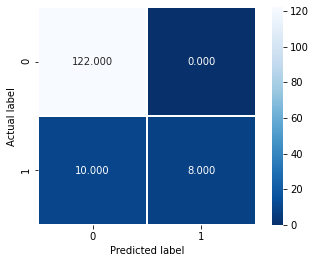

In [22]:
model_perf(x_train,y_train,lm)

Accuracy Score =  0.8285714285714286
Precision Score =  0.5
Recall Score =  0.16666666666666666
F1 Score =  0.25


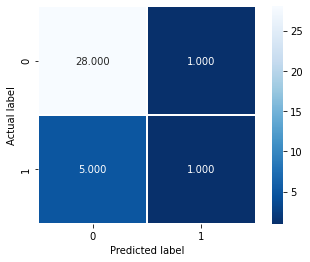

In [23]:
model_perf(x_test,y_test,lm)

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print('The mean square error of actual and predicted value is: ', mse)

The mean square error of actual and predicted value is:  0.17142857142857143
